# Scaling Data

## Exercises

### Work Prep

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [1]:
from wrangle import wrangle_zillow, check_columns
import pandas as pd

In [2]:
df = wrangle_zillow()

In [3]:
check_columns(df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
0,year,153,"[2005, 2011, 1926, 1972, 1973, 1960, 1950, 195...",0,0.0,int64
1,beds,19,"[4, 3, 0, 5, 2, 1, 6, 7, 8, 9, 25, 10, 11, 14,...",0,0.0,int64
2,baths,38,"[2.0, 4.0, 0.0, 1.0, 2.5, 3.5, 3.0, 5.5, 4.5, ...",0,0.0,float64
3,sqfeet,10557,"[3633, 1620, 2077, 1200, 171, 203, 1244, 1300,...",0,0.0,int64
4,prop_value,588178,"[296425, 847770, 646760, 5328, 6920, 14166, 16...",0,0.0,int64
5,prop_tax,46583,"[6941, 10244, 7924, 91, 255, 163, 2532, 3110, ...",0,0.0,int64
6,county,3,"[LA, Orange, Ventura]",0,0.0,object


In [4]:
from sklearn.model_selection import train_test_split

def split_data(df):
    '''Split into train, validate, test with a 60% train, 20% validate, 20% test'''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.25, random_state=123)
    
    
    print(f"train: {len(train)} ({round(len(train)/len(df)*100)}% of {len(df)})")
    print(f"validate: {len(validate)} ({round(len(validate)/len(df)*100)}% of {len(df)})")
    print(f"test: {len(test)} ({round(len(test)/len(df)*100)}% of {len(df)})")
    return train, validate, test

train, validate, test = split_data(df)

train: 1284141 (60% of 2140235)
validate: 428047 (20% of 2140235)
test: 428047 (20% of 2140235)


### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.


#### Stuff for all Scalers

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt

# Define columns to be scaled
to_scale = ['beds', 'baths', 'sqfeet', 'year', 'prop_tax']

In [6]:
def visualize_scaler(scaler, df, to_scale, bins=10):
    #create subplot structure
    fig, axs = plt.subplots(len(to_scale), 2, figsize=(12,12))

    #copy the df for scaling
    df_scaled = df.copy()
    
    #fit and transform the df
    df_scaled[to_scale] = scaler.fit_transform(df[to_scale])

    #plot the pre-scaled data next to the post-scaled data in one row of a subplot
    for (ax1, ax2), col in zip(axs, to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

#### MinMaxScaler

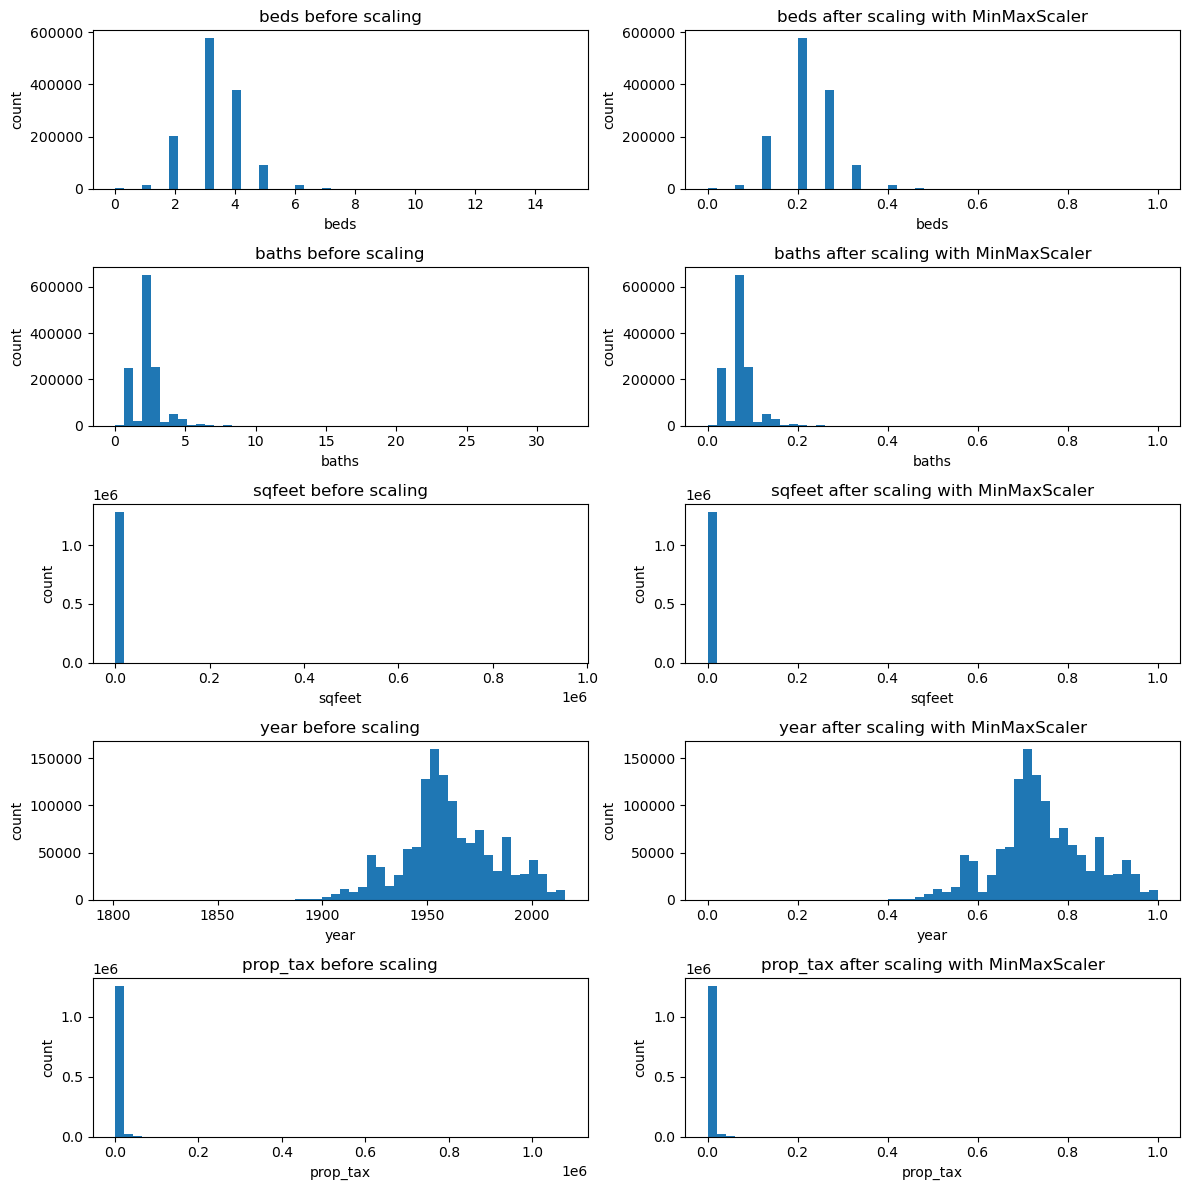

In [7]:
# call function with minmax
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 to_scale=to_scale, 
                 bins=50)

#### Standard Scaler

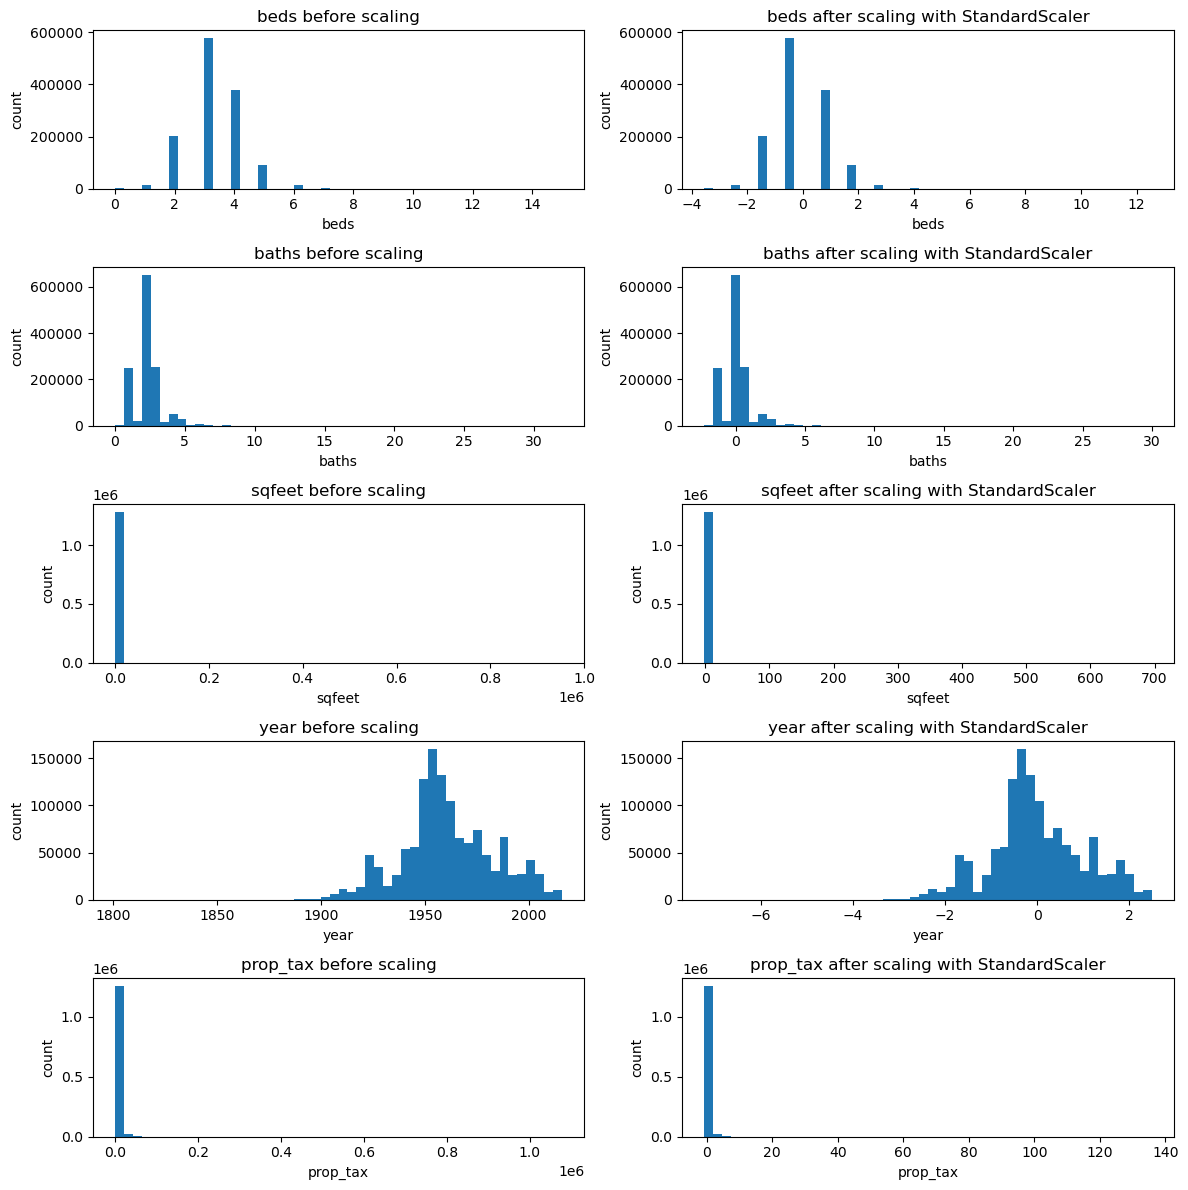

In [8]:
# call function with Standard
visualize_scaler(scaler=StandardScaler(), 
                 df=train, 
                 to_scale=to_scale, 
                 bins=50)

#### Robust

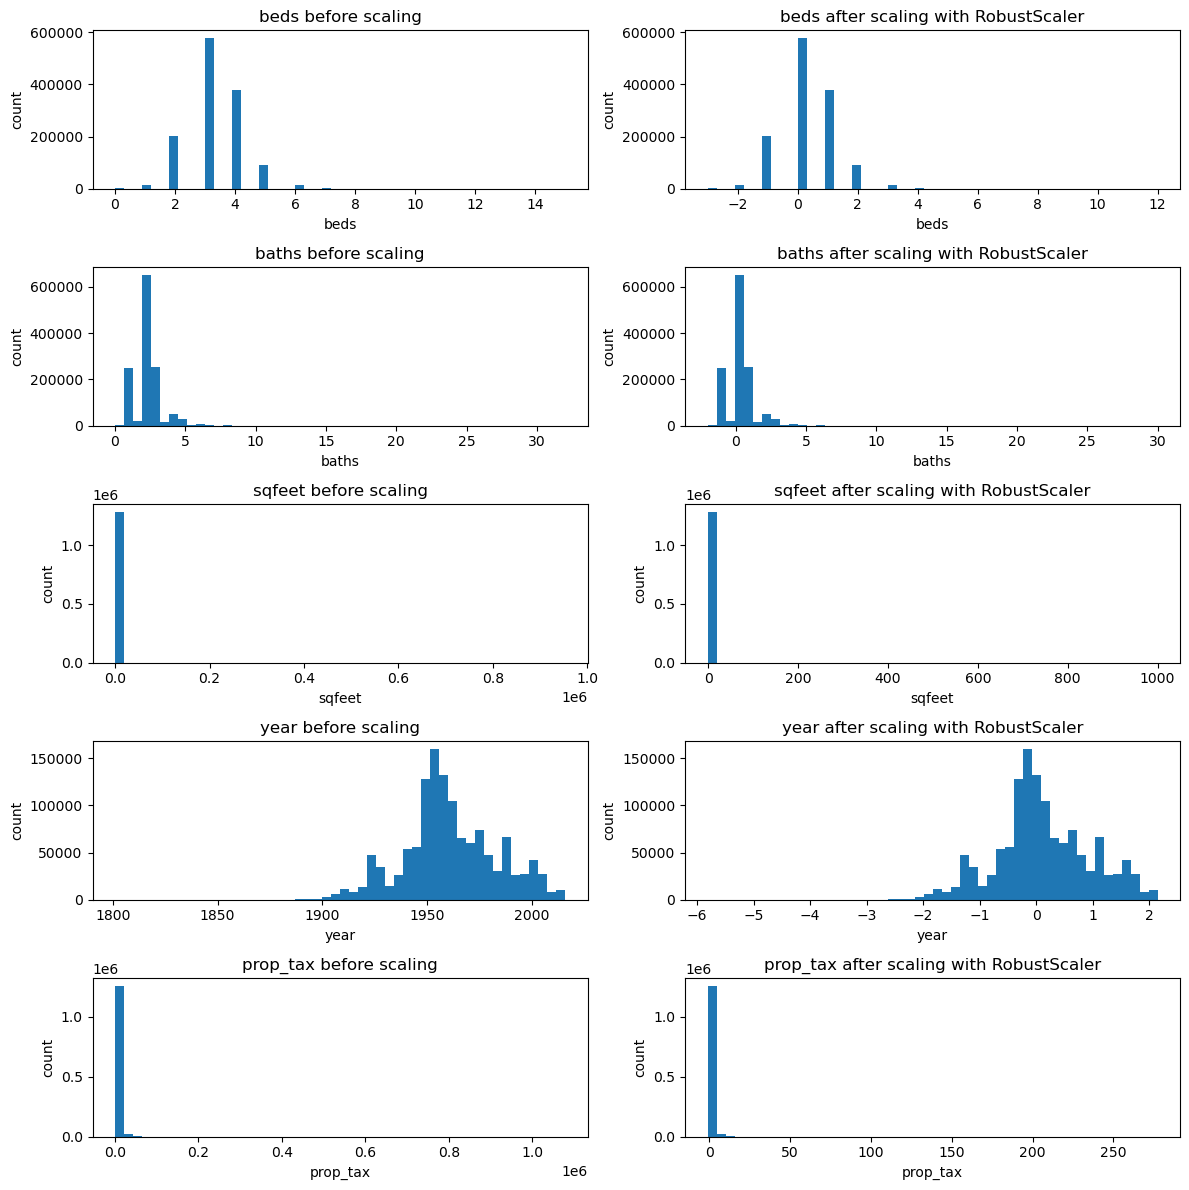

In [9]:
# call function with minmax
visualize_scaler(scaler=RobustScaler(), 
                 df=train, 
                 to_scale=to_scale, 
                 bins=50)

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


In [10]:
train[to_scale].head()

,beds,baths,sqfeet,year,prop_tax
1268902,4,2.0,2235,1977,4175
613034,3,2.5,1975,1967,7097
2040503,4,2.0,1796,1963,11386
2045869,3,2.5,2607,2000,6353
744180,4,2.0,1792,1957,2579


In [11]:
#make it
scaler = MinMaxScaler()

#fit and use it
train_scaled = scaler.fit_transform(train[to_scale])

#convert to df
train_scaled = pd.DataFrame(train_scaled, columns=to_scale)

train_scaled.head()

,beds,baths,sqfeet,year,prop_tax
0,0.266667,0.062500,0.002345,0.818605,0.003867
1,0.200000,0.078125,0.002072,0.772093,0.006577
2,0.266667,0.062500,0.001884,0.753488,0.010556
3,0.200000,0.078125,0.002736,0.925581,0.005887
4,0.266667,0.062500,0.001880,0.725581,0.002387


In [12]:
#applying the inverse_transform function to the scaled data
inverse_train_scaled = scaler.inverse_transform(train_scaled)

# This returns a np array. To compare, we'll make it a DF with column names applied
pd.DataFrame(inverse_train_scaled, columns=to_scale)

,beds,baths,sqfeet,year,prop_tax
0,4.0,2.0,2235.0,1977.0,4175.0
1,3.0,2.5,1975.0,1967.0,7097.0
2,4.0,2.0,1796.0,1963.0,11386.0
3,3.0,2.5,2607.0,2000.0,6353.0
4,4.0,2.0,1792.0,1957.0,2579.0
...,...,...,...,...,...
1284136,2.0,1.0,696.0,1954.0,918.0
1284137,3.0,3.0,2081.0,1987.0,7319.0
1284138,3.0,2.0,1742.0,1957.0,2512.0
1284139,4.0,3.0,2066.0,1924.0,7650.0


<div style="background-color: green; padding: 10px;">
<span style="font-size: 20px;">It returns the data unscaled as original (with different dtypes)</span>

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


`QuantileTransformer` is a class in the `sklearn.preprocessing` module that transforms features to follow a uniform or a normal distribution. It does this by mapping the original data to a uniform or normal distribution, and then mapping the uniform or normal distribution to the desired output distribution. 

The `output_distribution` parameter in the `QuantileTransformer` constructor specifies the desired output distribution. If `output_distribution='uniform'`, the transformed data will follow a uniform distribution. If `output_distribution='normal'`, the transformed data will follow a normal distribution.


In [13]:
from sklearn.preprocessing import QuantileTransformer

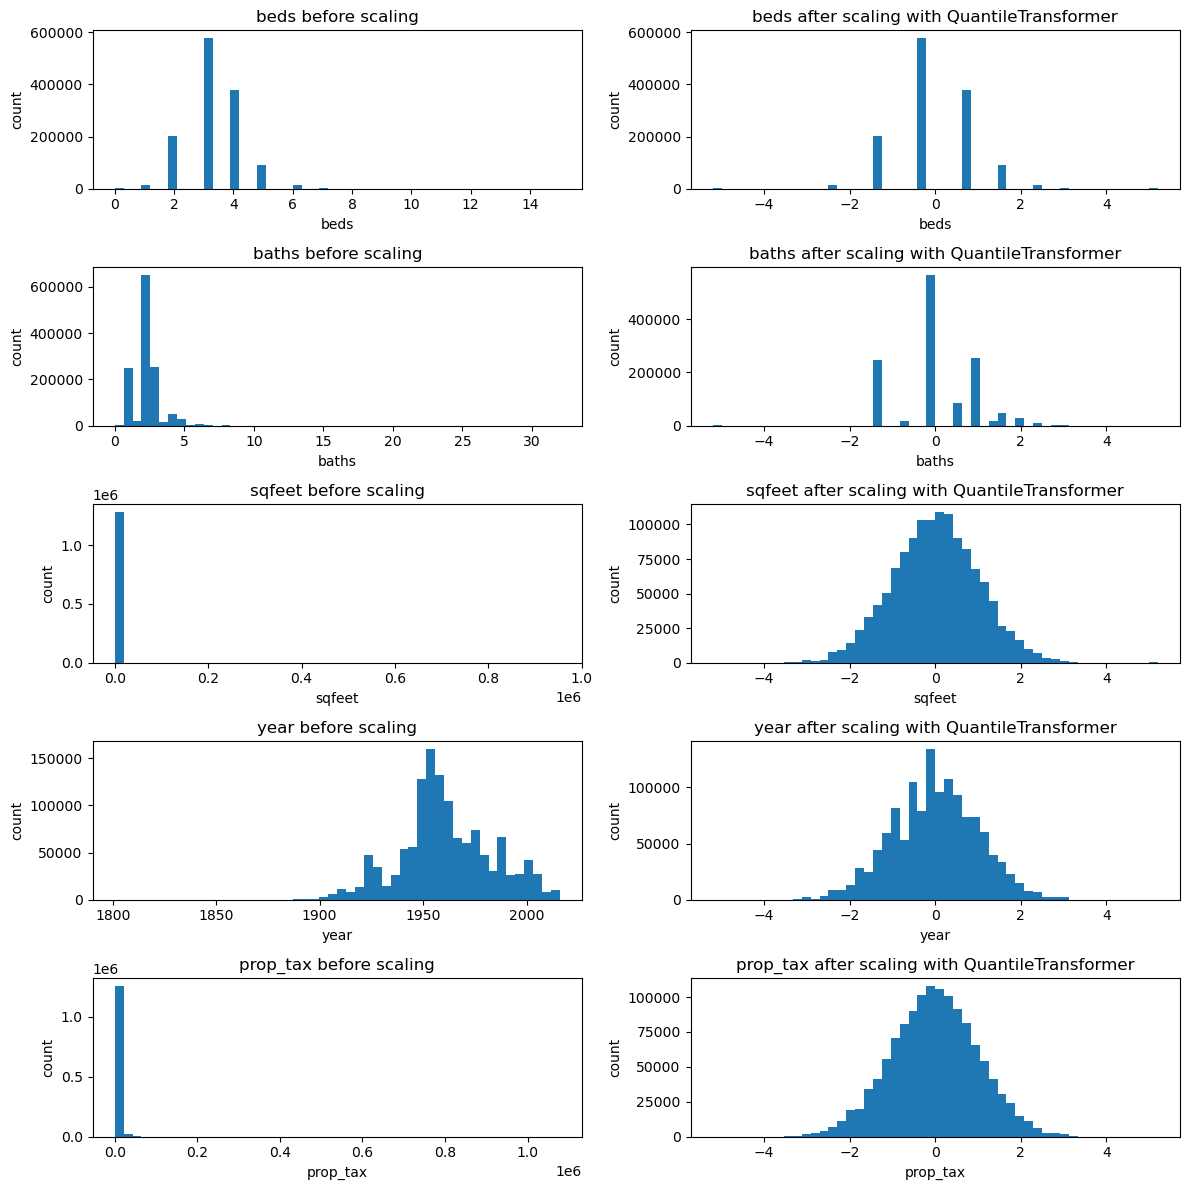

In [14]:
# call function using QuantileTransformer
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                 df=train,
                 to_scale=to_scale, 
                 bins=50)

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


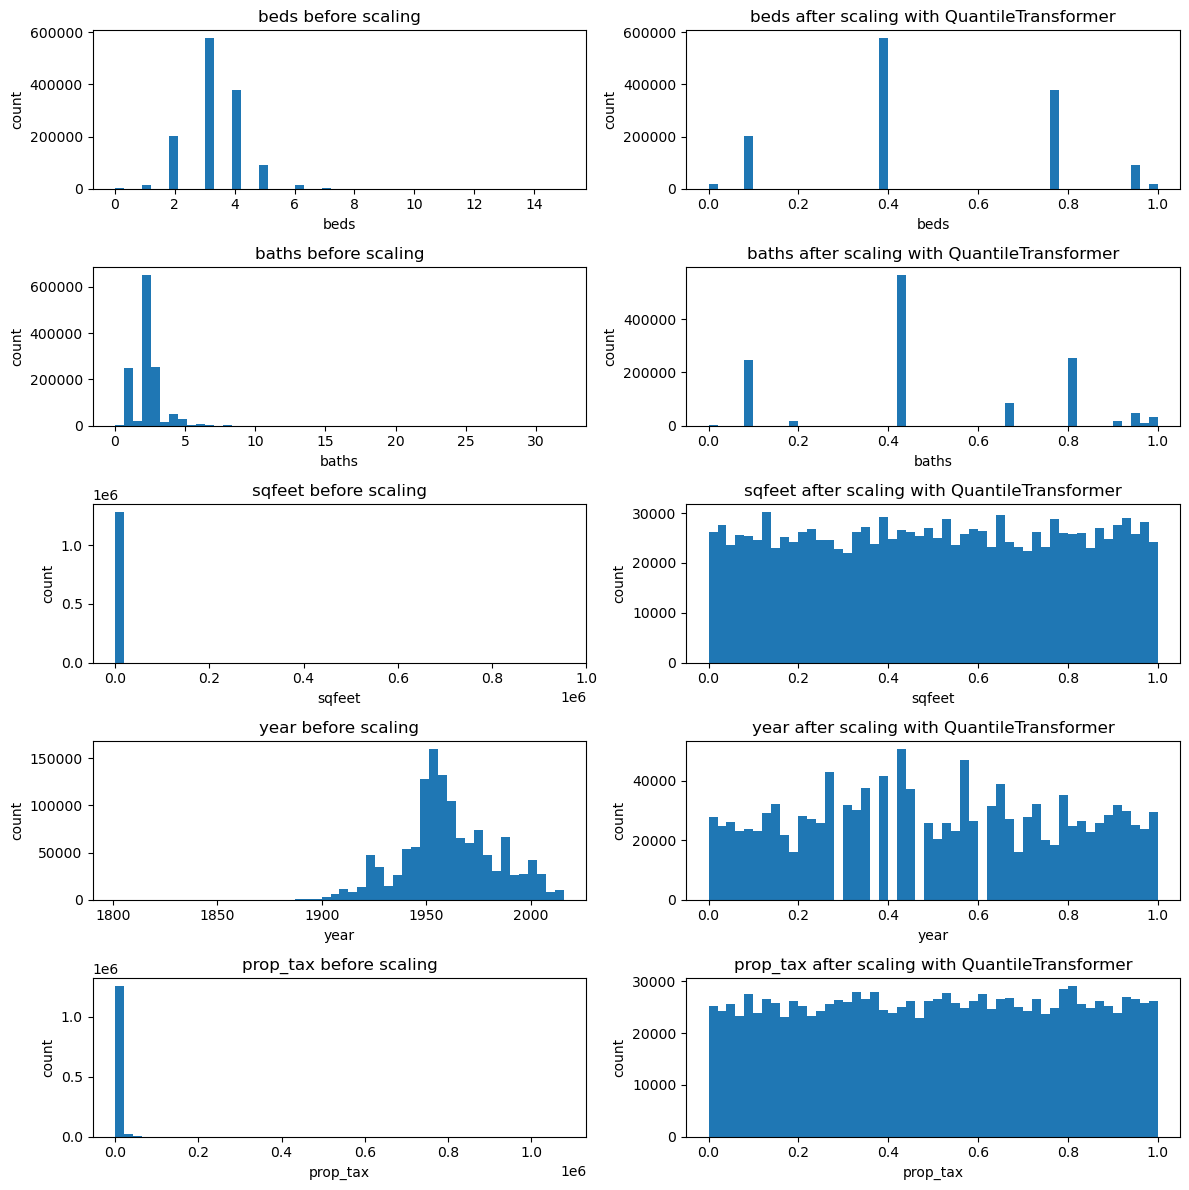

In [15]:
# call function using QuantileTransformer
visualize_scaler(scaler=QuantileTransformer(), 
                 df=train,
                 to_scale=to_scale, 
                 bins=50)

<div style="background-color: green; padding: 10px;">
<span style="font-size: 20px;">If output_distribution is left to default, it follows a uniform distribution (output_distribution='uniform').</span>

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your wrangle.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [16]:
from sklearn.preprocessing import QuantileTransformer

def quantiler(train, validate, test):
    '''
    This function scales the train, validate, and test data using QuantileTransformer.
    It returns the scaled versions of each. 
    Be sure to only learn the parameters for scaling from your training data!
    
    Parameters:
    -----------
    train : pandas DataFrame
        The training dataset to be scaled.
    validate : pandas DataFrame
        The validation dataset to be scaled.
    test : pandas DataFrame
        The test dataset to be scaled.
        
    Returns:
    --------
    train : pandas DataFrame
        The scaled training dataset.
    validate : pandas DataFrame
        The scaled validation dataset.
    test : pandas DataFrame
        The scaled test dataset.
        
    Example:
    --------
    # call the function
    train_scaled, validate_scaled, test_scaled = quantiler(train, validate, test)
    '''
    # create an instance of QuantileTransformer with normal distribution
    qt = QuantileTransformer(output_distribution='normal')
    
    # define the columns to be scaled
    scale = ['year', 'beds', 'baths', 'sqfeet', 'prop_value', 'prop_tax']
    
    # fit and transform the train data
    train[scale] = qt.fit_transform(train[scale])
    
    # transform the validate and test data
    validate[scale] = qt.transform(validate[scale])
    test[scale] = qt.transform(test[scale])    

    # return the scaled data
    return train, validate, test

In [17]:
train, validate, test = quantiler(train, validate, test)

In [18]:
train

,year,beds,baths,sqfeet,prop_value,prop_tax,county
1268902,0.728240,0.738089,-0.176553,0.692715,0.172512,0.037949,Orange
613034,0.400635,-0.256198,0.468203,0.438080,1.027595,0.837137,Orange
2040503,0.212353,0.738089,-0.176553,0.225099,0.888045,1.438490,LA
2045869,1.593219,-0.256198,0.468203,1.023003,0.722511,0.670600,Ventura
744180,-0.060256,0.738089,-0.176553,0.221344,-0.612528,-0.632004,LA
...,...,...,...,...,...,...,...
941799,-0.308427,-1.310017,-1.283836,-2.250374,-2.711256,-1.747987,LA
631585,1.053106,-0.256198,0.879040,0.549616,0.870834,0.881901,LA
883917,-0.060256,-0.256198,-0.176553,0.152391,-0.657428,-0.664439,LA
1253096,-1.620592,0.738089,0.879040,0.532721,0.866623,0.948744,LA


## Notes

<div style="background-color: green; padding: 10px;">
<span style="font-size: 60px;">If imputing data, do it after split</span>

*Imputing <u>**after**</u> split to avoid leakage/spillage. This keeps your train imputes, unique to train data*

We only call .fit with the training data,

but we use .transform to apply the scaling to all the data splits.
</div>


### Why Scale?

Scaling data is an important step in many machine learning algorithms because it can improve the performance and accuracy of the model. Here are a few reasons why scaling is important:

1. **<u>Different scales can affect the performance of some algorithms:</u>** 

Some machine learning algorithms, such as k-nearest neighbors and support vector machines, are sensitive to the scale of the input features. If the features are on different scales, the algorithm may give more weight to features with larger values, which can result in a biased model. Scaling the features to a similar scale can help prevent this issue.

2. **<u>Scaling can speed up the training process:</u>** 

Some optimization algorithms, such as gradient descent, converge faster when the features are on a similar scale. If the features are on different scales, the optimization algorithm may take longer to converge, which can increase the training time of the model.

3. **<u>Scaling can improve the interpretability of the model:</u>** 

When the features are on different scales, it can be difficult to interpret the coefficients of the model. Scaling the features to a similar scale can make the coefficients more comparable and easier to interpret.

Overall, scaling data is an important step in many machine learning algorithms because it can improve the performance, speed, and interpretability of the model.

### Min-Max Scaling

Min-Max Scaling scales the data to a fixed range between 0 and 1.

**Pros:**
- Preserves the shape of the original distribution.
- Easy to understand and implement.
- Works well with algorithms that assume normalized features.

**Cons:**
- Sensitive to outliers.
- Does not handle outliers well.
- Can result in loss of information if the minimum and maximum values are not representative of the data.

---

### Standard Scaler

Standard Scaler scales the data to have a mean of 0 and a standard deviation of 1.

**Pros:**
- Handles outliers well.
- Does not result in loss of information.
- Works well with algorithms that assume normalized features.

**Cons:**
- Does not preserve the shape of the original distribution.
- Can result in negative values.

---

### RobustScaler

RobustScaler scales the data based on percentiles and the median, making it more robust to outliers.

**Pros:**
- Handles outliers well.
- Does not result in loss of information.
- Works well with algorithms that assume normalized features.

**Cons:**
- Does not preserve the shape of the original distribution.
- Can result in negative values.

---